In [199]:
#First thing first , we import our libraries and dataset and then we see the head of the data to know how the data looks like .

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import mpl_toolkits
%matplotlib inline


In [200]:
data = pd.read_excel("DS1dataset.xlsx")

In [201]:
data.columns = [c.replace(' ', '_') for c in data.columns]

In [202]:
data.rename(columns = {'House_size_(sqft)': 'House_size_sqft'}, inplace=True)

In [203]:
data.head()

,Transaction_date,House_Age,Distance_from_nearest_Metro_station_(km),Number_of_convenience_stores,latitude,longitude,Number_of_bedrooms,House_size_sqft,House_price_of_unit_area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [204]:
#Use describe function to see the percentile’s and other key statistics.
data.describe()

,Transaction_date,House_Age,Distance_from_nearest_Metro_station_(km),Number_of_convenience_stores,latitude,longitude,Number_of_bedrooms,House_size_sqft,House_price_of_unit_area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

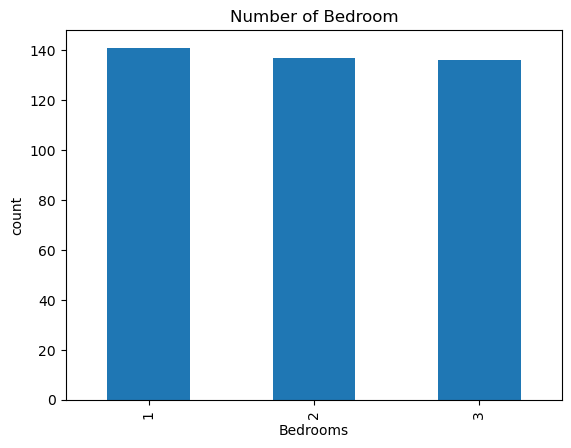

In [205]:
"""for a good locality a builder opts to make houses which are more than 3 bedrooms,
which attracts the higher middle class and upper class section of the society"""
data['Number_of_bedrooms'].value_counts().plot(kind='bar')
plt.title('Number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('count')
sns.despine

C:\Users\Nandita\Desktop\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x1000 with 0 Axes>

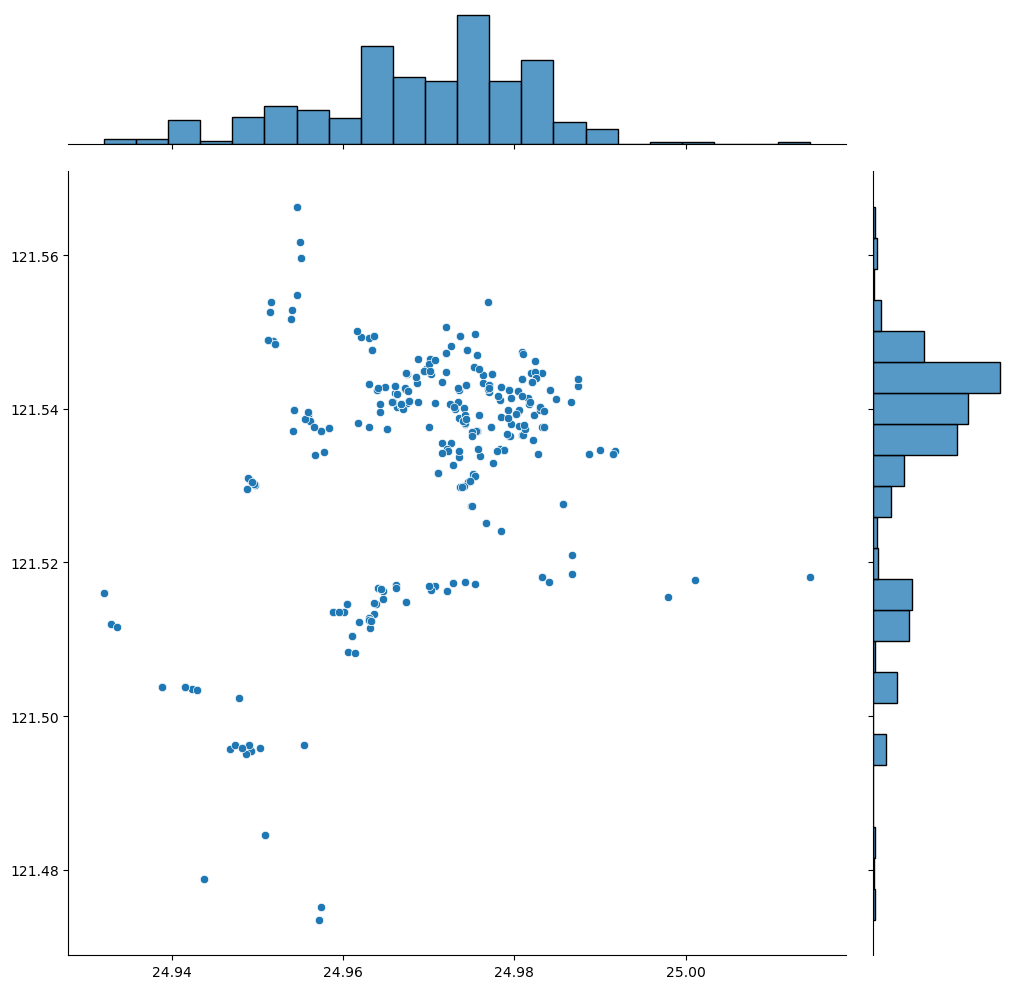

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [206]:
#Visualizing the location of the houses based on latitude and longitude.
plt.figure(figsize=(10,10))
sns.jointplot(x=data.latitude.values, y=data.longitude.values, size=10)
plt.ylabel('Longitude' , fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

Text(0.5, 1.0, 'Price VS Sqt')

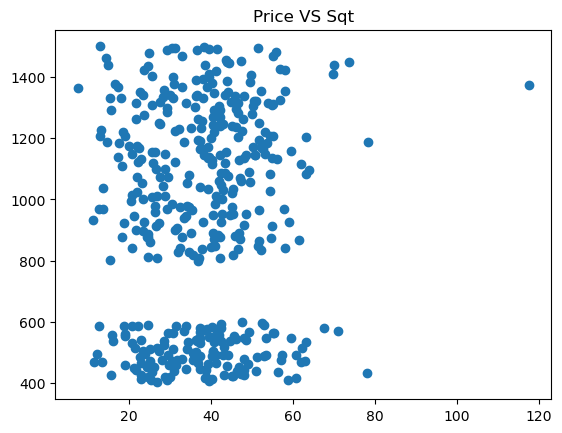

In [207]:
#Let us start with , If price is getting affecting by living area of the house or not ?
plt.scatter(data.House_price_of_unit_area,data.House_size_sqft)
plt.title("Price VS Sqt")

Text(0.5, 1.0, 'Price VS Longitude ')

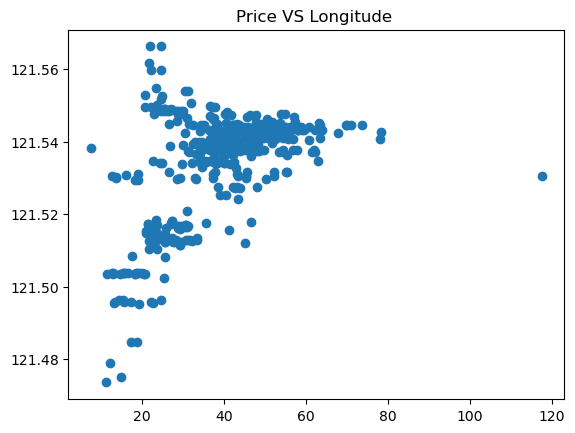

In [208]:
plt.scatter(data.House_price_of_unit_area,data.longitude)
plt.title("Price VS Longitude ")

Text(0.5, 1.0, 'Price VS Latitude')

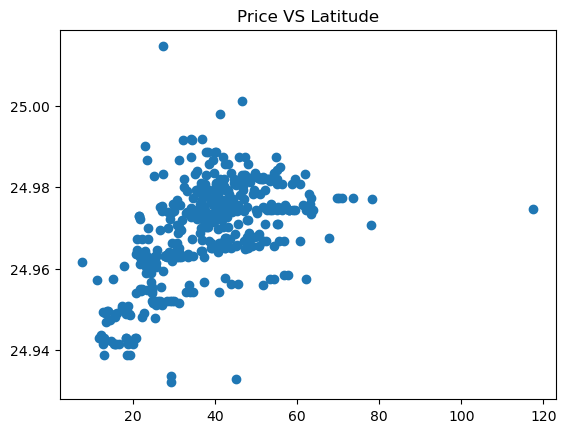

In [209]:
plt.scatter(data.House_price_of_unit_area,data.latitude)
plt.title("Price VS Latitude")

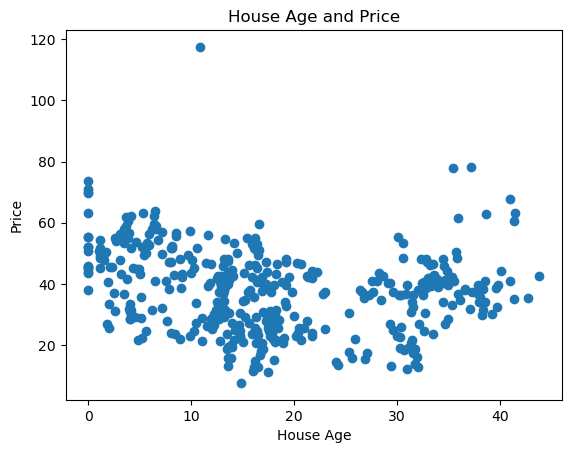

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [210]:
"""The plot that we used above is called scatter plot , 
scatter plot helps us to see how our data points are scattered and are usually used for two variables."""
plt.scatter(data.House_Age,data.House_price_of_unit_area)
plt.title("House Age and Price")
plt.xlabel("House Age")
plt.ylabel("Price")
plt.show()
sns.despine

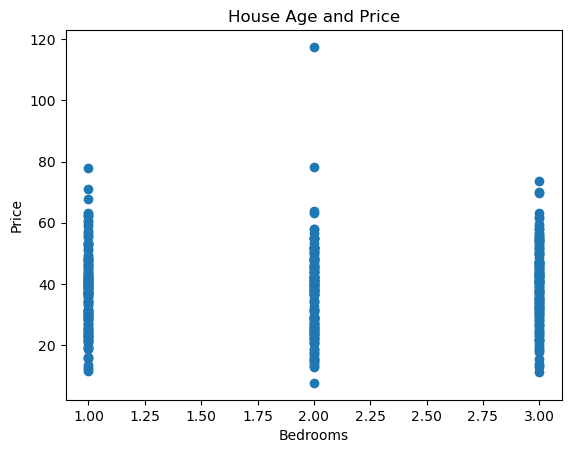

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [211]:
#e can see more factors affecting the price
plt.scatter(data.Number_of_bedrooms,data.House_price_of_unit_area)
plt.title("House Age and Price")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()
sns.despine

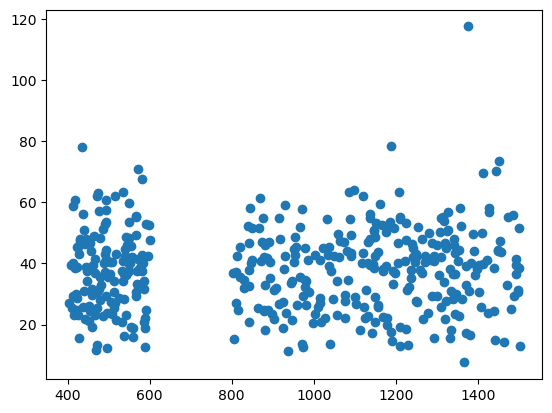

In [212]:
plt.scatter((data['House_size_sqft']+data['Number_of_bedrooms']),data['House_price_of_unit_area'])

Text(0.5, 1.0, 'Number of Convenience Stores VS Price')

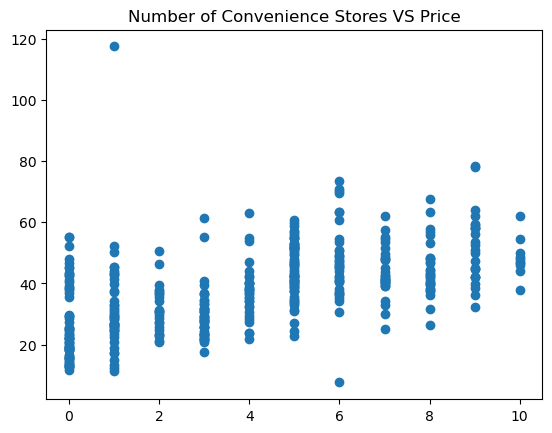

In [213]:
plt.scatter(data.Number_of_convenience_stores,data.House_price_of_unit_area)
plt.title("Number of Convenience Stores VS Price")
"""As we can see from all the above representation that many factors are affecting the prices of the house"""

In [214]:
data["id"] = data.index

In [215]:
train1 = data.drop(['id', 'House_price_of_unit_area'],axis=1)

In [216]:
train1.head()

,Transaction_date,House_Age,Distance_from_nearest_Metro_station_(km),Number_of_convenience_stores,latitude,longitude,Number_of_bedrooms,House_size_sqft
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491


<AxesSubplot:>

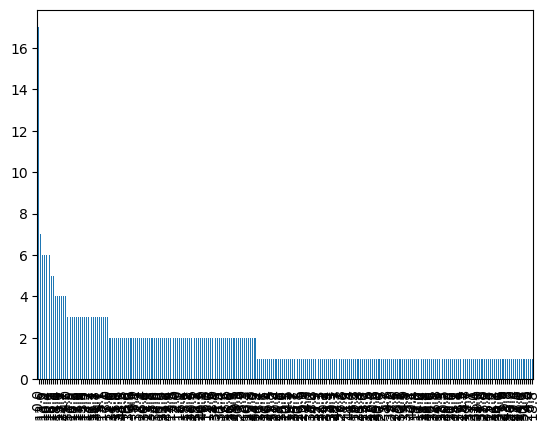

In [217]:
data.House_Age.value_counts().plot(kind='bar')

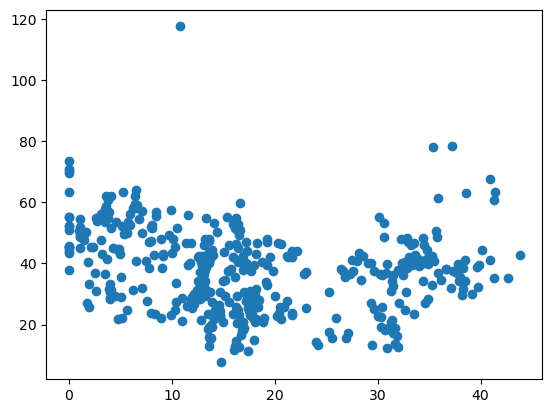

In [218]:
plt.scatter(data.House_Age,data.House_price_of_unit_area)

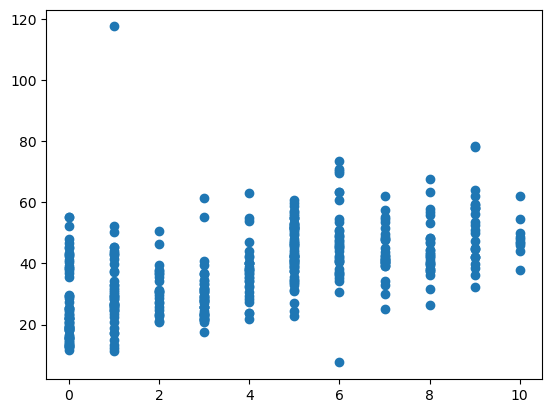

In [219]:
plt.scatter(data.Number_of_convenience_stores,data.House_price_of_unit_area)

Text(0.5, 1.0, 'Which is the pricey location ')

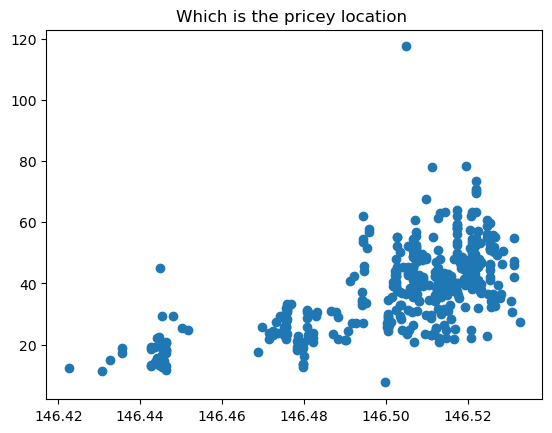

In [220]:
plt.scatter((data['latitude']+data['longitude']),data['House_price_of_unit_area'])
plt.title("Which is the pricey location ")

In [221]:
#Linear Regression
""" a model in statistics which helps us predicts the future based upon past relationship of variables. 
So when you see your scatter plot being having data points placed linearly you know regression can help you!"""
from sklearn.linear_model import LinearRegression

In [222]:
reg = LinearRegression()

In [223]:
labels = data['House_price_of_unit_area']
conv_dates = [1 if values == 2014 else 0 for values in data.Transaction_date]
data['Transaction_date'] = conv_dates
train1 = data.drop(['id', 'House_price_of_unit_area'],axis=1)

In [224]:
from sklearn.model_selection import train_test_split

In [225]:
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10,random_state =2)

In [226]:
reg.fit(x_train,y_train)

LinearRegression()

In [227]:
reg.score(x_test,y_test)

0.6768452282085351

In [228]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'absolute_error')


In [229]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(loss='absolute_error', max_depth=5, n_estimators=400)

In [230]:
#Accuracy Rate
clf.score(x_test,y_test)

0.8336123378452236

In [231]:
t_sc = np.zeros((params['n_estimators']),dtype=np.float64)

In [232]:
y_pred = reg.predict(x_test)

In [233]:
for i,y_pred in enumerate(clf.staged_predict(x_test)):
    t_sc[i]=clf.loss_(y_test,y_pred)

In [234]:
testsc = np.arange((params['n_estimators']))+1

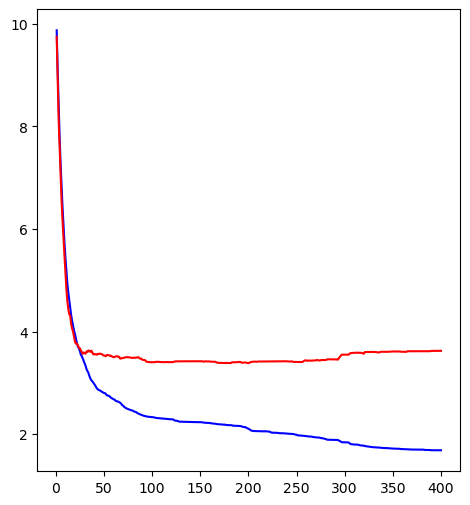

In [235]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(testsc,clf.train_score_,'b-',label= 'Set dev train')
plt.plot(testsc,t_sc,'r-',label = 'set dev test')

In [236]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [237]:
pca = PCA()

In [238]:
pca.fit_transform(scale(train1))

array([[-1.96147016, -1.82019712,  1.3480456 , ..., -0.18292395,
         0.13988307,  0.        ],
       [-1.77824741,  0.48293382,  0.34729895, ..., -0.61424331,
         0.09708364, -0.        ],
       [-1.5047344 ,  1.03260658, -0.19570969, ...,  0.57130165,
         0.46192442,  0.        ],
       ...,
       [-1.19249266, -1.83280879,  0.0975301 , ...,  0.00367394,
         0.13677313, -0.        ],
       [-0.59574717, -1.54590497, -1.02987458, ..., -0.12096757,
        -0.3155695 , -0.        ],
       [-1.75201735,  0.25870935, -0.87305926, ..., -0.27676905,
         0.06300368, -0.        ]])